### Accretion Disks

Ruth Murray-Clay, Astrophysics II

**Goal:** 

We want to solve the time evolution of the surface density of an accretion disk, which evolves according to:

$\frac{\partial\Sigma}{\partial t} = \frac{3}{r} \frac{\partial}{\partial r}\left[r^{1/2} \frac{\partial}{\partial r} (\Sigma \nu r^{1/2})\right]$

### Set up

#### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

#### Define constants

In [2]:
Msun = 1.99e33 # g; mass of the Sun
AU = 1.496e13 # cm; Astronomical Unit
sec_to_years = 3.154e7 # number of seconds in a year
kB = 1.3807e-16 # erg/K; Boltzmann constant
mH = 1.6733e-24 # g; mass of hydrogen atom
G = 6.67259e-8 # cm^3/g/s^2; gravitational constant

#### Utility for solving a matrix equation
Utility for solving equations of the form $M\vec x = \vec r$, where M is a tri-diagonal matrix (the only non-zero entries are on the diagonal or one to the left or right of the diagonal).  This function takes vectors $\vec a$, $\vec b$, and $\vec c$ describing the entries in $M$.  It also takes the vector $\vec r$.  It solves for $\vec x$.

IT IS NOT NECESSARY TO UNDERSTAND HOW THIS FUNCTION WORKS FOR THIS CLASS, just to know what it does.

In [3]:
def solve_tri_diag(a,b,c,r):
    
    """Solver for tri-diagonal matrices, i.e. matrices where the only non-zero entries are on the diagonal
    or one to the left or right of the diagonal. Adapted from Chap. 2 of Numerical Recipies by Mickey Rosenthal"""
    
    # In each row of the matrix, b is the value on the diagonal, 
    # a is the value to the left of the diagonal, and
    # c is the value to the right of the diagonal.
    # The vectors a, b, and c are indexed by the matrix row.
    
    # The vector r is the right-hand-side of the equation.
    # Calling the matrix M, we are solving for the vector x in Mx = r.
    
    N = len(a)
    u = np.zeros(N)
    gamma = np.zeros(N)
    
    # return an error if the top left corner value of the matrix is zero
    assert b[0]!=0,"Linearly dependent system of equations"
    
    # solve
    
    beta = b[0]
    u[0] = r[0]/beta
    
    for j in range(1,N):
        gamma[j] = c[j-1]/beta
        beta = b[j] - a[j]*gamma[j]
        
        # if you ever get a zero "pivot", the matrix isn't in the right form,
        # so return an error to avoid division by zero
        assert beta!=0, "Zero pivot at j = "+str(j)
        
        u[j] = (r[j]-a[j]*u[j-1])/beta
    
    for j in reversed(range(N-1)):
        u[j] -= gamma[j+1]*u[j+1]
        
    return u

### Self-similar solution

There exists a *self-similar* solution to the equation that has a nice analytic form over time.  **Plug in the function calculated below into the disk evolution equation at the top of the notebook and verify that it is a solution to the equation.** You can choose to do the case  $\gamma=1$  to make the algebra less messy. You can put your calculation in a Markdown cell or add it to your written homework solutions.

In [4]:
# This function returns an array of the surface density of the disk (in g/cm^2) 
# at the radii in rad_array (provided in cm).  
# rscale (cm) = scale of the disk at time 0
# sigma0 (g/cm^2) = disk surface density at time 0 and radius rscale
# kinematic viscosity nu is given by nu = nu0*(rad_array/rscale)**gamma
# nu0 (cm^2/s) = viscosity at rscale
# gamma = exponent for viscosity's radial dependence

def sig_sim(t, rad_arr, rscale, sigma0, nu0, gamma):
    
    R = rad_arr/rscale # normalized radius variable
    
    tvisc = rscale**2/nu0 / (3*(2-gamma)**2) # viscous timescale times an order unity constant
    T = t/tvisc + 1 # time normalized to viscous timescale
    
    C = sigma0*np.exp(1) # normalization coefficient
    sigma = C/R**gamma*T**(-(5./2.-gamma)/(2.-gamma))*np.exp(-R**(2.-gamma)/T)
    
    return sigma

#### Set up radial array for disk

In [5]:
npts = 3000 # number of radial points
# set up an array of radii that are log-spaced so we can plot results over a range of radii
r_inner = 0.01*AU
r_outer = 1e3*AU
rad_arr = np.linspace(r_inner,r_outer,num=npts) # cm

#### Disk parameters

In [6]:
rscale = 10.0*AU
sigma0 = 100.0 # g/cm^2 # surface density at rscale
T0 = 100.0 # K # temperature at rscale
mu = 2.0*mH # approximate mean molecular weight for disk gas (molecular hydrogen)
cs0 = np.sqrt(kB*T0/mu) # sound speed at rscale
alpha = 1e-3 # alpha parameter for the accretion disk
M_star = Msun

# INSERT YOUR EXPRESSION(S) HERE
Omega = np.sqrt(G*M_star/rscale**3)
H0 = cs0/Omega  # scale height of disk at rscale

# kinematic viscosity at rscale
nu0 = alpha*cs0*H0

# INSERT YOUR RESULT HERE
gamma = 1.0

# viscous time
tvisc = rscale**2/nu0

# define function nu that takes radius r and returns the viscosity
nu = lambda r: nu0*(r/rscale)**gamma

#### Plot the similarity solution 

**Plot the similarity solution at time 0, 0.1 viscous times, 1 viscous time, and 3 viscous times.**

Text(0, 0.5, '$\\Sigma$')

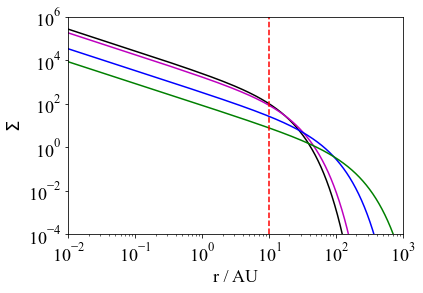

In [11]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=18)

sigma_0 = sig_sim(0.0, rad_arr, rscale, sigma0, nu0, gamma)
sigma_01 = sig_sim(0.1*tvisc, rad_arr, rscale, sigma0, nu0, gamma)
sigma_1 = sig_sim(tvisc, rad_arr, rscale, sigma0, nu0, gamma)
sigma_3 = sig_sim(3.0*tvisc,rad_arr, rscale, sigma0, nu0, gamma)



plt.plot(rad_arr/AU, sigma_0, 'k')
plt.plot(rad_arr/AU, sigma_01, 'm')
plt.plot(rad_arr/AU, sigma_1, 'b')
plt.plot(rad_arr/AU, sigma_3, 'g')
plt.axvline(x=rscale/AU, color='red', linestyle='dashed')


plt.xscale("log")
plt.yscale("log")
plt.xlim(0.01,1000)
plt.ylim(1e-4,1e6)
plt.xlabel("r / AU")
plt.ylabel("$\Sigma$")


### First attempt to numerically solve to evolution equation

Let's see if we can discretize the equation in an easy way

$\frac{\partial\Sigma}{\partial t} = \frac{3}{r} \frac{\partial}{\partial r}\left[r^{1/2} \frac{\partial}{\partial r} (\Sigma \nu r^{1/2})\right]$

and get a good answer. We'll use a finite difference method to calculate the radial derivatives and then evolve the equation forward in time by saying that $\Delta \Sigma$ is equal to the right-hand side of the equation times $\Delta t$.  This is similar to what we did to solve the wind outflow problem in an earlier problem set, but *try* to make things easy, we'll use the built-in numpy function np.gradient to calculate the radial derivatives (for details on the finite difference scheme it uses, see the documentation).

In [12]:
delta_t = 1e-3*tvisc # timestep for simulation
t_arr = np.arange(0,5.0*tvisc,delta_t) # array of times
sig_arr = np.zeros((len(t_arr),len(rad_arr))) # array to hold surface density results

In [13]:
# Initial condition
sig_arr[0] = sig_sim(0.0, rad_arr, rscale, sigma0, nu0, gamma)

In [14]:
tstart = time.time() # for tracking how long the integration takes

for i in range(len(t_arr)-1): # loop through array of times
    
    # np.gradient(f,x) returns an array containing df/dx, calculated
    # using a finite difference method (see the man page for details)
    # np.gradient IS GREAT FOR WHEN YOU NEED TO PLOT DERIVATIVES
    
    grad1 = np.gradient(nu(rad_arr)*sig_arr[i]*rad_arr**0.5, rad_arr)
    grad2 = np.gradient(rad_arr**0.5*grad1, rad_arr)
     
    dSigdt = (3./rad_arr)*grad2
    
    sig_arr[i+1] = sig_arr[i] + dSigdt*delta_t
           
    if (i % int((len(t_arr)-1)/10) == 0):
        print ("%i%%" %math.ceil(100*i/(len(t_arr)-1))) # simple progress tracker
    
print("Integration took %.3f seceonds" %(time.time()-tstart)) # print how long integration took

0%
10%
20%


<ipython-input-14-205abf33d196>:9: RuntimeWarning: overflow encountered in multiply
  grad1 = np.gradient(nu(rad_arr)*sig_arr[i]*rad_arr**0.5, rad_arr)
C:\Users\dougl\anaconda3\lib\site-packages\numpy\lib\function_base.py:1081: RuntimeWarning: invalid value encountered in multiply
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
C:\Users\dougl\anaconda3\lib\site-packages\numpy\lib\function_base.py:1081: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


30%
40%
50%
60%
70%
80%
90%
100%
Integration took 0.892 seceonds


#### Plot the solution

**Plot the solution at several output time indices.**

Text(0.5, 1.0, 'Index = 5')

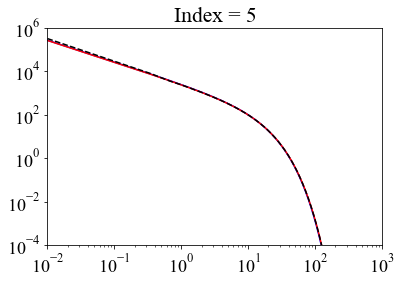

In [17]:
ind = 5 # choose which time index to plot

sig_analyt_0 = sig_sim(t_arr[0], rad_arr, rscale, sigma0, nu0, gamma)
sig_analyt = sig_sim(t_arr[ind], rad_arr, rscale, sigma0, nu0, gamma)

plt.loglog(rad_arr/AU, sig_analyt_0, color='blue')
plt.loglog(rad_arr/AU, sig_analyt, color='red')

plt.loglog(rad_arr/AU, sig_arr[ind], color='black', linestyle='dashed')

plt.xlim(0.01,1000)
plt.ylim(1e-4,1e6)
plt.title("Index = 5")

Text(0.5, 1.0, 'Index = 15')

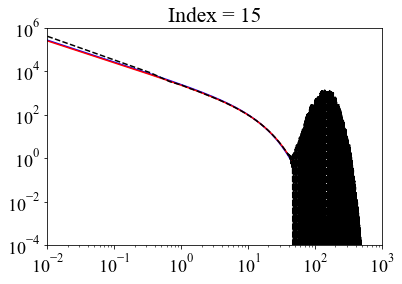

In [20]:
ind = 15 # choose which time index to plot

sig_analyt_0 = sig_sim(t_arr[0], rad_arr, rscale, sigma0, nu0, gamma)
sig_analyt = sig_sim(t_arr[ind], rad_arr, rscale, sigma0, nu0, gamma)

plt.loglog(rad_arr/AU, sig_analyt_0, color='blue')
plt.loglog(rad_arr/AU, sig_analyt, color='red')

plt.loglog(rad_arr/AU, sig_arr[ind], color='black', linestyle='dashed')

plt.xlim(0.01,1000)
plt.ylim(1e-4,1e6)
plt.title("Index = 15")

Uh oh.  Let's zoom in to show that we are actually solving the right equation (it's just numerically unstable):

Text(0.5, 1.0, 'Index = 15')

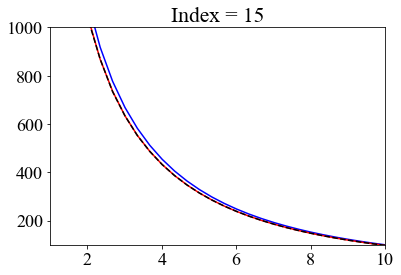

In [21]:
ind = 15 # choose which time index to plot

sig_analyt_0 = sig_sim(t_arr[0], rad_arr, rscale, sigma0, nu0, gamma)
sig_analyt = sig_sim(t_arr[ind], rad_arr, rscale, sigma0, nu0, gamma)

plt.plot(rad_arr/AU, sig_analyt_0, color='blue')
plt.plot(rad_arr/AU, sig_analyt, color='red')

plt.plot(rad_arr/AU, sig_arr[ind], color='black', linestyle='dashed')

plt.xlim(1,10)
plt.ylim(1e2,1e3)
plt.title("Index = 15")

You should see the black dashed line on top of the red line.  So, it's evolving the equation but some numerical instability is making the solution blow up.  It's possible that increasing the time and spatial resolution could help.  Changing the boundary conditions from the default used by np.gradient could also help.  We will use a different method to solve the equations.

### Disk evolution solver

This code solves the for time evolution of the surface density of an accretion disk using an **implicit method**.  This will give a more stable solution than the method we tried above.  More on implicit methods below.  First, let's put our equation in a nicer form:  

Recall the equation we are solving is:
$\frac{\partial\Sigma}{\partial t} = \frac{3}{r} \frac{\partial}{\partial r}\left[r^{1/2} \frac{\partial}{\partial r} (\Sigma \nu r^{1/2})\right]$

It is easier to solve if the double derivative is together, in the form $\frac{\partial^2}{\partial y^2}$, so we'll define $\frac{\partial}{\partial y} \equiv r^{1/2}\frac{\partial}{\partial r}$.  Integrating, that implies that $y = 2r^{1/2}$.  So, we have:

$\frac{\partial\Sigma}{\partial t} = \frac{3}{r^{3/2}} \frac{\partial^2}{\partial y^2} (\Sigma \nu r^{1/2})$

Now we want to combine all of the dependences inside the derivative so we can calculate the derivative all at once.  Since $\nu = \nu_0 (r/r_0)^\gamma$ (we are using rscale for $r_0$), we'll  let $u = \Sigma r^{\gamma + 1/2}$. We now have

$\frac{\partial\Sigma}{\partial t} = \frac{3}{r^{3/2}} \frac{\partial^2}{\partial y^2} (\Sigma \nu_0 r_0^{-\gamma} r^{\gamma + 1/2}) = 3\nu_0 r^{-3/2}r_0^{-\gamma} \frac{\partial^2 u}{\partial y^2}$

Since $r$ isn't a function of time, we can bring factors of $r$ inside the time derivative to transform $\Sigma$ into $u$ on the left:

$r^{-(\gamma + 1/2)}\frac{\partial(\Sigma r^{\gamma + 1/2})}{\partial t} = 3\nu_0 r^{-3/2}r_0^{-\gamma} \frac{\partial^2 u}{\partial y^2}$

$\frac{\partial u}{\partial t} = 3 \nu_0 \left(\frac{r}{r_0}\right)^\gamma r^{-1} \frac{\partial^2 u}{\partial y^2}$

Using the expression for $\nu$ and $y = 2r^{1/2}$ (so everything is in terms of $u$ and $y$):

$\frac{\partial u}{\partial t} = 12\nu y^{-2} \frac{\partial^2 u}{\partial y^2}$

That's much nicer!

This can be transformed into the discrete expression:

$\frac{\Delta u}{\Delta t} = 12 \nu y^{-2} \frac{\Delta^2 u}{(\Delta y)^2}$

where $\Delta^2$ just reminds us that we're thinking about a second derivative.  We will use a **backwards-in-time, central in space (BTCS)** implicit menthod to calculate the values of $\Delta u$ on each side of the equation.  This will overcome our stability issues.  There are a variety of ways to do this, often with acronyms like BTCS, and it's not obvious (at least to me) which one will do best for a given problem, but often you can find guidance for similar problems to help you decide.  The implementation below is based on an example by Mickey Rosenthal.

Using $i$ for the spatial index and $j$ for the time index:

"*Backwards in time*": We'll calculate the spatial derivative of $u$ at time $j+1$, so $\Delta u$ is calculated "backwards in time" by taking the difference between that and the previous time: $\Delta u = u_i^{j+1} - u_i^{j}$

"*Central in space*": The second derivative $\Delta^2 u$ is approximated $(u_{i+1} - u_i) - (u_i - u_{i-1})$.  Evaluating at time $j+1$: $\Delta^2 u = u_{i+i}^{j+1} - 2u_i^{j+1} + u_{i-1}^{j+1}$

So, we have 

$\frac{u_i^{j+1} - u_i^{j}}{\Delta t} = 12\frac{\nu}{y^2} \frac{u_{i+i}^{j+1} - 2u_i^{j+1} + u_{i-1}^{j+1}}{(\Delta y)^2}$

For convenience, let's define $C_i = 12 \frac{\Delta t}{(\Delta y)^2} \frac{\nu}{y^2}$, where we have subscripted $i$ to remind us that it is evaluated at spatial location $i$.  Rearranging, we get

$u_i^{j} = -C_i u_{i+1}^{j+1} + (1 + 2C_i) u_i^{j+1} - C_i u_{i-1}^{j+1}$

This equation is **implicit** (as opposed to **explicit**) because the value of u at time $j+1$ isn't written explicitly as a function of the value at time $j$ but instead an equation relating the two is provided (that implicitly gives the value at time $j+1$ as a function of the value at time $j$). We need to do some solving to get the value at time $j+1$.  Solving implicit equations is a little more challenging than the explicit version.  Note that this is a matrix equation $\vec u^{j} = M \vec u^{j+1}$, where if you write it out you'll see that the matrix M is "tridiagonal."  Each row in the matrix has $1+2C_i$ on the diagonal, $-C_i$ to the left of the diagonal, and $-C_i$ to the right of the diagonal.  Luckily we have a utility to solve equations like this up top.  Note that the top row doesn't have a "left of the diagonal" and the bottom row doesn't have a "right of the diagonal" spot, so we need to choose how to handle these boundary conditions. 

In [26]:
# I made it a class!  The number of times I typed "self" was large.  Is that how
# it's supposed to be, Jules?
class disk_integration:
    """ A class for performing a time integration of the surface density
    of an accretion disk using a BTCS implicit method.
    
    Parameters
    ----------
    r_inner : float, optional
        Inner radius of the disk (cm)
    r_outer: float, optional
        Outer radius of the disk (cm)
    npts : int, optional
        Number of radial points
    r0 : float, optional
        Disk reference radius (cm)
    sigma0 : float, optional
        Surface density normalization (g/cm^2) at radius r0
    T0 : float, optional
        Disk temperature at radius r0 (K)
    alpha : float, optional 
        Parameter for computing viscosity (dimensionless)
    gamma : float, optional
        Powerlaw index for radial dependence of viscosity nu = nu0(r/r0)^gamma
    Mstar : float, optional
        Mass of the central star (g)
    delta_t : int, optional
        Time step of the integration in units of the viscous time at radius r0
    tfinal : float, optional
        Final time for the integration, in units of the viscous time at radius r0
    """
    
    def __init__(self, r_inner=0.01*AU, r_outer=1e3*AU, npts=300, r0=10.0*AU, sigma0=100.0, T0 = 100.0, alpha=1e-3, gamma=1.0, Mstar=Msun, delta_t=1e-3, tfinal=5.0):
        
        # add all the inputs as variables
        self.r_inner = r_inner
        self.r_outer = r_outer
        self.npts = npts
        self.r0 = r0
        self.sigma0 = sigma0
        self.T0 = T0
        self.alpha = alpha
        self.gamma = gamma
        self.Mstar = Mstar
        self.delta_t = delta_t
        self.tfinal = tfinal
    
        # calculate the viscosity normalization at r0
        self.mu = 2.0*mH # mean molecular weight (g)
        self.cs0 = np.sqrt(kB*self.T0/self.mu) # sound speed at r0
        self.Omega = np.sqrt(G*self.Mstar/self.r0**3) # orbital angular frequency at r0
        self.H0 = self.cs0/self.Omega  # scale height of disk at r0
        self.nu0 = self.alpha*self.cs0*self.H0 # kinematic viscosity at r0

        # calculate the viscous time and set up the array of times
        self.tvisc = self.r0**2/self.nu0
        self.delta_t = self.delta_t*self.tvisc # timestep for simulation (s)
        self.tfinal = self.tfinal*self.tvisc # end time for simulation (s)
        self.t_arr = np.arange(0,self.tfinal,self.delta_t) # array of times
        
        # set up the radius array, making it linear in our transformed variable y
        # for nice differencing
        self.y_arr = np.linspace(2*self.r_inner**(1/2),2*self.r_outer**(1/2),num=self.npts)
        self.delta_y = self.y_arr[1]-self.y_arr[0]
        self.rad_arr = (self.y_arr/2.)**2. # array of actual disance from star (cm)

        # set up surface density array in transformed variables
        self.u_arr = np.zeros((len(self.t_arr),len(self.y_arr))) # array to hold transformed surface density
        self.sig_arr = np.zeros(self.u_arr.shape) # array to hold actual surface density (g/cm^2)
  

    def sig_sim(self, t):
        """ Calculate similarity solution for the disk at time t 
        
        Parameters
        ----------
        t : float
            Time (s)
        """ 
        R = self.rad_arr/self.r0 # normalized radius variable
    
        tvisc_mod = self.tvisc / (3*(2-self.gamma)**2) # viscous timescale times an order unity constant
        T = t/tvisc_mod + 1 # time normalized to viscous timescale
        # (see module for discussion of this similarity solution) 
    
        C = self.sigma0*np.exp(1) # normalization coefficient
        sigma = C/R**gamma*T**(-(5./2.-gamma)/(2.-gamma))*np.exp(-R**(2.-gamma)/T)
    
        return sigma
    
    def sig_delta(self):
        """ Generate a gaussian surface density profile at radius r0 that is 
            thin to mimic a delta function. """

        # YOUR FUNCTION HERE
        thin = 0.01 # parameter giving the initial thinness of the gaussian
        
        # standard deviation of the gaussian
        stddev = thin*self.r0/2. # factor of 2 because the standard deviation is half the gaussian width
        
        mean = self.r0 # center of the gaussian
        
        # for approximate comparison, put the same disk mass in a ring with area
        # 2*pi*r0*(thin*r0) that would otherwise be in area pi*r0^2, hence the
        # factor of 2
        sigma = self.sigma0/(thin*2.0)*np.exp(-0.5*((self.rad_arr-mean)/stddev)**2)
        
        
        return sigma
        
    
    def set_ic(self, ic_type):
        """ Set up the initial disk surface density profile 
        
        Parameters
        ----------
        ic_type : str
            Type of initial condition.  Options: 'selfsim' = self-similar disk,
            'deltafn' = thin Gaussian approximating a delta function.
        """
        if ic_type == 'selfsim':
            sig_init = self.sig_sim(self.t_arr[0])
        elif ic_type == 'deltafn':
            sig_init = self.sig_delta()
        else:
            raise NotImplementedError(f"I don't have initial conditions for type {ic_type}.")
        
        self.u_arr[0] = sig_init*self.rad_arr**(self.gamma+1/2)
        self.sig_arr[0] = self.u_arr[0]/(self.rad_arr**(self.gamma+1/2)) # we'll transform to actual surface density as we go 
      
        
    def nu(self, r):
        """ Calculate the viscosity at radius r 
        
        Parameters
        ----------
        r : float or array of floats
            Disk radius or radii (cm)
        """
        return self.nu0*(r/self.r0)**self.gamma
    
    
    def C_i(self, i):
        """ Calculate C_i, defined in the Markdown notes
        
        Parameters
        ----------
        i : int
            Radial position index
        """
        return 12.*self.delta_t/self.delta_y**2.*self.nu(self.rad_arr[i])/self.y_arr[i]**2.
    
   
    def evolve_disk(self):

        # for keeping track of how long the integration takes
        tstart = time.time()

        # In each time step, we'll solve the matrix equation excluding 
        # the two boundary radii, then explicitly adjust the boundaries
        N = len(self.y_arr)-2 # number of radii minus the two boundaries

        # for holding adjustments to the matrix to account for boundary conditions (BCs)
        bc_vec = np.zeros(N)
    
        for j in range(len(self.t_arr)-1): # loop through array of times
        
            # These are for setting up an array for tri-diagonal solving. 
            # In each row of the matrix, b is the value on the diagonal, 
            # a is the value to the left of the diagonal, and
            # c is the value to the right of the diagonal.
            # The vectors a, b, and c are indexed by the matrix row.
            a = np.zeros(N)
            b = np.zeros(N)
            c = np.zeros(N)
    
            # Choose a fixed value D_in for u at the innermost radius.
            # Setting to a fixed value is called a Dirichlet boundary condition.
            D_in = 0.0  # fixed value of u_0
            # We'll add the below to the value of u_1^j (the second radial location)
            # before solving the matrix equation.  Without this, the matrix equation 
            # set up below would be, at the left boundary (where there is no value, a, 
            # to the left of the diagonal because it's the top left corner of the matrix):
            # u_1^j = -C_1 u_2^{j+1} + (1 + 2C_1) u_1^{j+1} but we want
            # u_1^j = -C_1 u_2^{j+1} + (1 + 2C_1) u_1^{j+1} - C_1 u_0^{j+1}
            # We accomplish this by adding C_1 u_0 to u_1^j before solving the matrix
            # equation, so that u_1^j + C_1 u_0 = -C_1 u_2^{j+1} + (1 + 2C_1) u_1^{j+1}
            bc_vec[0] = self.C_i(1)*D_in 
            # At the outer edge of the disk, we'll instead use a zero-derivative boundary
            # condition, which is called a Neumann boundary condition.
            # We'll add the below to the value of u_-2, where like Python indexing, 
            # I'm using -2 as shorthand for npts-2 (so that the index -1 refers to the last
            # element of the array). 
            # The matrix equation without this extra addition would be
            # u_-2^j = (1 + 2C_-2) u_-2^{j+1} - C_-2 u_-3
            # but we want u_-2^j = -C_-2 u_-1^{j+1} + (1 + 2C_-2) u_-2^{j+1} - C_-2 u_-3^{j+1}
            # with u_-1^{j+1} - u_-2^{j+1} = 0, so that u_-2^j = (1 + C_-2) u_-2^{j+1} - C_-2 u_-3^{j+1}
            # We accomplish this by adding C_-2 u_-2^j to u_-2^j before solving the matrix
            # equation, so that u_-2^j + C_-2 u_-2^j = (1 + 2C_-2) u_-2^{j+1} - C_-2 u_-3.
            # It's not exactly perfect since the extra term on the LHS has u_-2^j instead
            # of u_-2^{j+1}, but it does the job.
            bc_vec[-1] = self.C_i(-2)*self.u_arr[j][-2] 
    
            for i in range(N): 
            
                # Set up and solve the matrix equation.
                # (If this were an explicit scheme we'd loop through u_arr 
                # and set the values of u[j+1] explicitly.)
        
                Ci = self.C_i(i)
        
                if i == 0: # a[0] is undefined
                    b[0] = 1+2*Ci
                    c[0] = -Ci
                elif i == N - 1: # c[-1] is undefined
                    a[-1] = -Ci
                    b[-1] = 1+2*Ci
                else:
                    a[i] = -Ci
                    b[i] = 1+2*Ci
                    c[i] = -Ci
                    
            sol = solve_tri_diag(a,b,c,self.u_arr[j][1:-1]+bc_vec)
    
            #u at next timestep is the solution with the inner and outer BCs added
            self.u_arr[j+1] = np.concatenate(([D_in],sol,[sol[-1]])) 
        
            self.sig_arr[j+1] = self.u_arr[j+1]/(self.rad_arr**(self.gamma+1/2)) # convert from u to actual surface density
            
            if (j % int((len(self.t_arr)-1)/10) == 0):
                print ("%i%%" %math.ceil(100*j/(len(self.t_arr)-1))) # rudimentary progress tracker
    
        print("Integration took %.3f seceonds" %(time.time()-tstart)) # print how long integration took


Integrate the self-similar solution forward in time.

In [23]:
# set up the disk
disk = disk_integration()
# set the initial condition
disk.set_ic('selfsim')
# run the simulation
disk.evolve_disk()

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Integration took 6.128 seceonds


Plot the result.

(0.0001, 1000000.0)

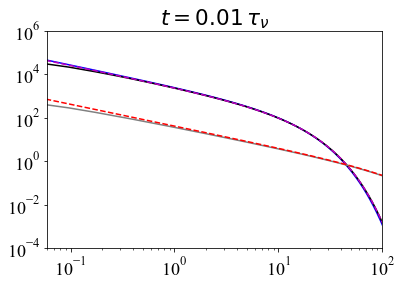

In [24]:
ind = 10


plt.loglog(disk.rad_arr/AU,disk.sig_arr[0], 'b') # initial disk structure

plt.loglog(disk.rad_arr/AU,disk.sig_arr[ind], 'k') # numerical result
plt.loglog(disk.rad_arr/AU, disk.sig_sim(disk.t_arr[ind]), 'm--') # analytic result for comparison

plt.loglog(disk.rad_arr/AU,disk.sig_arr[-1], color='gray') # numerical result at the end of the integration
plt.loglog(disk.rad_arr/AU, disk.sig_sim(disk.t_arr[-1]), 'r--') # analytic result for comparison at the end of the integration

plt.title(r"$t = %.2f \, \tau_\nu$" %(disk.t_arr[ind]/disk.tvisc)) # the r makes this a raw string

plt.xlim(6e-2,100)
plt.ylim(1e-4,1e6)

**Now add the ability to start with a "delta function" (really use a Gaussian to make it smooth) surface density profile instead of the self-similar solution.  Try to normalize your initial disk mass to have about the same total mass as the self-similar solution for the same parameter sigma0.  Integrate forward in time.  At late times, how does the profile compare to the self-similar solution?  Given your answer, what counts as "late times"?**

In [27]:
#setup
disk = disk_integration()
disk.set_ic('deltafn')

#integrate
disk.evolve_disk()

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Integration took 5.998 seceonds


(0.0001, 1000000.0)

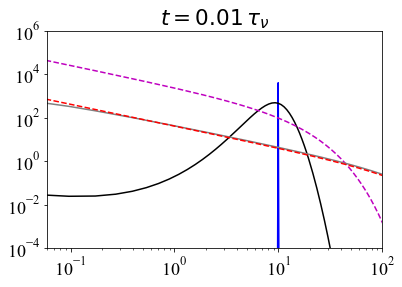

In [28]:
ind = 10

plt.plot(disk.rad_arr/AU,disk.sig_arr[0], 'b') # initial disk structure

plt.plot(disk.rad_arr/AU,disk.sig_arr[ind], 'k') # numerical result
plt.plot(disk.rad_arr/AU, disk.sig_sim(disk.t_arr[ind]), 'm--') # analytic result for comparison

plt.plot(disk.rad_arr/AU,disk.sig_arr[-1], color='gray') # numerical result
plt.plot(disk.rad_arr/AU, disk.sig_sim(disk.t_arr[-1]), 'r--') # analytic result for comparison

plt.title(r"$t = %.2f \, \tau_\nu$" %(disk.t_arr[ind]/disk.tvisc)) # the r makes this a raw string
plt.xscale("log")
plt.yscale("log")
plt.xlim(6e-2,100)
plt.ylim(1e-4,1e6)

(0.0001, 1000000.0)

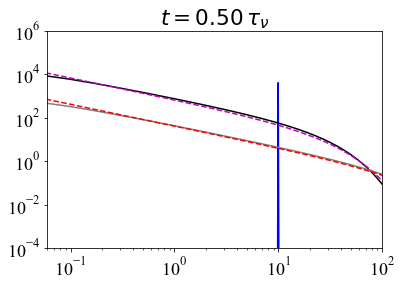

In [29]:
ind = 500

plt.plot(disk.rad_arr/AU,disk.sig_arr[0], 'b') # initial disk structure

plt.plot(disk.rad_arr/AU,disk.sig_arr[ind], 'k') # numerical result
plt.plot(disk.rad_arr/AU, disk.sig_sim(disk.t_arr[ind]), 'm--') # analytic result for comparison

plt.plot(disk.rad_arr/AU,disk.sig_arr[-1], color='gray') # numerical result
plt.plot(disk.rad_arr/AU, disk.sig_sim(disk.t_arr[-1]), 'r--') # analytic result for comparison

plt.title(r"$t = %.2f \, \tau_\nu$" %(disk.t_arr[ind]/disk.tvisc)) # the r makes this a raw string
plt.xscale("log")
plt.yscale("log")
plt.xlim(6e-2,100)
plt.ylim(1e-4,1e6)

After about a viscous time, the solution looks exactly like the self-similar solution. 